In [15]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import models
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [17]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [18]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [19]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/shreya/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10, batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10


2024-09-09 03:13:19.330485: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 - 20s - 48ms/step - accuracy: 0.9273 - loss: 0.2397 - val_accuracy: 0.9822 - val_loss: 0.0596
Epoch 2/10
422/422 - 18s - 43ms/step - accuracy: 0.9753 - loss: 0.0800 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 3/10
422/422 - 17s - 41ms/step - accuracy: 0.9811 - loss: 0.0591 - val_accuracy: 0.9922 - val_loss: 0.0311
Epoch 4/10
422/422 - 17s - 41ms/step - accuracy: 0.9845 - loss: 0.0485 - val_accuracy: 0.9895 - val_loss: 0.0357
Epoch 5/10
422/422 - 17s - 41ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9927 - val_loss: 0.0269
Epoch 6/10
422/422 - 17s - 41ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.9933 - val_loss: 0.0258
Epoch 7/10
422/422 - 17s - 41ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9923 - val_loss: 0.0293
Epoch 8/10
422/422 - 17s - 41ms/step - accuracy: 0.9903 - loss: 0.0292 - val_accuracy: 0.9925 - val_loss: 0.0306
Epoch 9/10
422/422 - 17s - 41ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9925 - val_loss: 0

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9904 - loss: 0.0250
Test accuracy: 0.9919999837875366


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label: 6
Actual Label: 6


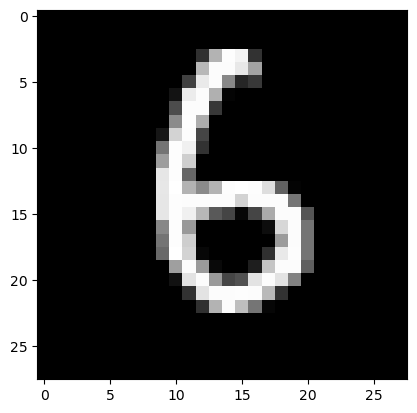

In [12]:
import numpy as np
image_index=21

image = np.reshape(test_images[image_index], (1, 28, 28, 1))

predictions = model.predict(image)
predicted_label = np.argmax(predictions)

actual_label = np.argmax(test_labels[image_index])

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")

import matplotlib.pyplot as plt

plt.imshow(np.squeeze(test_images[image_index]), cmap='gray')
plt.show()


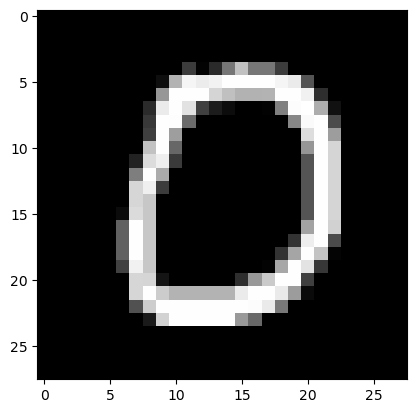

In [13]:
plt.imshow(np.squeeze(test_images[10]), cmap='gray')